<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/SIR_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

In [29]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [31]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [33]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [34]:
""" beta is twice of each of 1000 gamma values """
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  

In [36]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [37]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
I_value = pd.DataFrame(Q)
R_value = pd.DataFrame(M)

In [52]:
S_value

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,999.0,997.238538,993.942133,987.814149,976.561708,956.357654,921.491340,865.206879,783.287448,679.898014,569.505767,469.315799,389.430592,330.940896,290.082173,262.148419,243.194292,230.345111,221.620227,215.682248,211.632278,208.865155,206.971989,205.675474,204.786941,204.177701,203.759819,203.473119,203.276388,203.141377,203.048716,202.985116,202.941461,202.911496,202.890928,202.876809,202.867117,202.860464,202.855897,202.852763,...,202.845902,202.845901,202.845901,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900
1,999.0,998.813434,998.609527,998.386680,998.143147,997.877026,997.586243,997.268537,996.921444,996.542281,996.128129,995.675807,995.181859,994.642523,994.053716,993.411001,992.709562,991.944178,991.109190,990.198472,989.205397,988.122806,986.942970,985.657559,984.257607,982.733476,981.074826,979.270582,977.308907,975.177176,972.861962,970.349018,967.623275,964.668852,961.469068,958.006481,954.262933,950.219624,945.857203,941.155886,...,737.447710,722.702551,707.672300,692.404811,676.950572,661.361980,645.692571,629.996221,614.326353,598.735170,583.272939,567.987347,552.922947,538.120697,523.617611,509.446517,495.635920,482.209961,469.188470,456.587095,444.417498,432.687597,421.401853,410.561584,400.165282,390.208948,380.686418,371.589674,362.909147,354.633993,346.752352,339.251582,332.118465,325.339394,318.900537,312.787971,306.987804,301.486277,296.269844,291.325239
2,999.0,998.448838,997.746527,996.852082,995.713690,994.266035,992.427061,990.094152,987.139717,983.406283,978.701358,972.792542,965.403756,956.213919,944.860003,930.946998,914.067642,893.834517,869.925645,842.141568,810.467092,775.125386,736.608344,695.668213,653.263258,610.463495,568.335851,527.834944,489.722587,454.528071,422.548204,393.876694,368.449017,346.090553,326.559851,309.583084,294.878960,282.175123,271.217856,261.776950,...,205.568744,205.200893,204.882814,204.607754,204.369880,204.164154,203.986224,203.832328,203.699216,203.584076,203.484480,203.398327,203.323802,203.259333,203.203564,203.155320,203.113584,203.077479,203.046245,203.019223,202.995847,202.975624,202.958128,202.942993,202.929898,202.918570,202.908770,202.900291,202.892956,202.886610,202.881120,202.876370,202.872261,202.868706,202.865630,202.862969,202.860667,202.858676,202.856953,202.855462
3,999.0,997.859801,996.074381,993.285596,988.946518,982.236046,971.954435,956.423328,933.456208,900.531578,855.351966,796.879804,726.546893,648.782760,570.041910,496.637129,432.821721,380.220430,338.435427,306.011346,281.189501,262.319303,248.015653,237.180432,228.968238,222.737575,218.004690,214.405408,211.665424,209.577785,207.986048,206.771721,205.844895,205.137249,204.596799,204.183951,203.868525,203.627501,203.443311,203.302541,...,202.847521,202.847139,202.846847,202.846624,202.846453,202.846323,202.846223,202.846147,202.846089,202.846044,202.846010,202.845984,202.845964,202.845949,202.845937,202.845928,202.845922,202.845916,202.845912,202.845909,202.845907,202.845905,202.845904,202.845903,202.845902,202.845902,202.845901,202.845901,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900,202.845900
4,999.0,997.008791,993.058749,985.291737,970.280402,942.207112,892.771535,814.156565,706.877940,586.214995,474.795730,387.095382,324.821289,282.915657,255.342031,237.315403,225.526830,217.798666,212.718645,209.371714,207.162780,205.703087,20

In [38]:
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
# define dataset
s_list = []
i_list = []
r_list = []
for i in range(1000):
  s_list.append(array(S_value.iloc[i][0:70]))
  i_list.append(array(I_value.iloc[i][0:70]))
  r_list.append(array(R_value.iloc[i][0:70]))


In [54]:
s_list[0]

array([[999.        ],
       [997.23853799],
       [993.94213321],
       [987.81414946],
       [976.5617082 ],
       [956.35765357],
       [921.49133956],
       [865.20687876],
       [783.28744822],
       [679.89801426],
       [569.50576664],
       [469.31579872],
       [389.43059219],
       [330.94089612],
       [290.08217319],
       [262.1484189 ],
       [243.19429219],
       [230.34511058],
       [221.62022686],
       [215.68224811],
       [211.63227835],
       [208.86515462],
       [206.97198875],
       [205.67547416],
       [204.78694059],
       [204.17770135],
       [203.75981876],
       [203.4731194 ],
       [203.27638847],
       [203.14137742],
       [203.04871557],
       [202.98511563],
       [202.94146113],
       [202.91149624],
       [202.89092766],
       [202.87680875],
       [202.86711701],
       [202.86046421],
       [202.85589743],
       [202.85276259],
       [202.85061069],
       [202.84913352],
       [202.84811952],
       [202

In [57]:
# reshape series
for i in range(1000):
  s_list[i] =s_list[i].reshape(70,1)
  i_list[i] =i_list[i].reshape(70,1)
  r_list[i] =r_list[i].reshape(70,1)

In [58]:
p = []
q = []
r = []
for i in range(1000):
  p.append(s_list[i])
  q.append(i_list[i])
  r.append(r_list[i])  



In [59]:
s = tuple(p)
t = tuple(q)
u = tuple(r)


In [68]:
#s

In [69]:
# horizontally stack columns
dataset = hstack(s)
# define generator
n_input = 10
n_features = dataset.shape[1]
generator = TimeseriesGenerator(dataset, dataset, length=n_input, batch_size=1)
# number of samples
print('Samples: %d' % len(generator))

Samples: 60


In [70]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1000))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit_generator(generator, steps_per_epoch=1, epochs=500, verbose=0)

In [73]:
list = []
P = [np.array(pd.DataFrame(dataset).iloc[60]).tolist(), np.array(pd.DataFrame(dataset).iloc[61]).tolist(), np.array(pd.DataFrame(dataset).iloc[62]).tolist(), np.array(pd.DataFrame(dataset).iloc[63]).tolist(), np.array(pd.DataFrame(dataset).iloc[64]).tolist(), np.array(pd.DataFrame(dataset).iloc[65]).tolist(), np.array(pd.DataFrame(dataset).iloc[66]).tolist(), np.array(pd.DataFrame(dataset).iloc[67]).tolist(), np.array(pd.DataFrame(dataset).iloc[68]).tolist(), np.array(pd.DataFrame(dataset).iloc[69]).tolist()]
P = np.array(P)
x_input = P.reshape((1, n_input, n_features))
list.append(model.predict(x_input, verbose=0))

In [74]:
list[0]

array([[195.29678 , 561.7705  , 214.62509 , 281.94604 , 214.16971 ,
        300.40305 , 158.80304 , 193.05838 , 207.96518 , 196.87334 ,
        155.64734 , 273.85797 , 394.93295 , 278.1298  , 166.51341 ,
        214.28415 , 292.3412  ,  86.4475  , 129.68944 , 226.06749 ,
        193.85933 , 180.31386 , 566.35046 , 190.11691 , 209.96074 ,
        345.37726 , 196.75272 , 560.6178  , 219.8164  , 252.26723 ,
        157.1482  , 241.97069 , 184.15141 , 109.79165 , 236.44373 ,
        183.91158 , 686.7157  , 170.25986 , 165.25291 , 148.5555  ,
        257.56717 , 717.1159  , 276.30966 , 781.4275  , 223.26033 ,
        157.68324 , 170.41484 , 346.83514 , 273.36557 , 309.0599  ,
        247.99458 , 164.97108 , 251.36824 , 370.2733  , 238.15466 ,
        222.63045 , 188.91324 , 153.1207  , 157.77345 , 186.78186 ,
        442.93112 , 194.68506 , 139.68907 , 164.93294 , 446.8548  ,
         71.00416 , 508.0688  , 276.86755 , 214.285   , 237.5154  ,
        187.47765 , 241.78159 , 132.97389 , 116.

In [76]:
Q = [np.array(pd.DataFrame(dataset).iloc[61]).tolist(), np.array(pd.DataFrame(dataset).iloc[62]).tolist(), np.array(pd.DataFrame(dataset).iloc[63]).tolist(), np.array(pd.DataFrame(dataset).iloc[64]).tolist(), np.array(pd.DataFrame(dataset).iloc[65]).tolist(), np.array(pd.DataFrame(dataset).iloc[66]).tolist(), np.array(pd.DataFrame(dataset).iloc[67]).tolist(), np.array(pd.DataFrame(dataset).iloc[68]).tolist(), np.array(pd.DataFrame(dataset).iloc[69]).tolist(), np.array(pd.DataFrame(list[0]).iloc[0]).tolist()]
Q = np.array(Q)
x_input = Q.reshape((1, n_input, n_features))
list.append(model.predict(x_input, verbose=0))

Q = [np.array(pd.DataFrame(dataset).iloc[62]).tolist(), np.array(pd.DataFrame(dataset).iloc[63]).tolist(), np.array(pd.DataFrame(dataset).iloc[64]).tolist(), np.array(pd.DataFrame(dataset).iloc[65]).tolist(), np.array(pd.DataFrame(dataset).iloc[66]).tolist(), np.array(pd.DataFrame(dataset).iloc[67]).tolist(), np.array(pd.DataFrame(dataset).iloc[68]).tolist(), np.array(pd.DataFrame(dataset).iloc[69]).tolist(), np.array(pd.DataFrame(list[0]).iloc[0]).tolist(), np.array(pd.DataFrame(list[1]).iloc[0]).tolist()]
Q = np.array(Q)
x_input = Q.reshape((1, n_input, n_features))
list.append(model.predict(x_input, verbose=0))


Q = [np.array(pd.DataFrame(dataset).iloc[63]).tolist(), np.array(pd.DataFrame(dataset).iloc[64]).tolist(), np.array(pd.DataFrame(dataset).iloc[65]).tolist(), np.array(pd.DataFrame(dataset).iloc[66]).tolist(), np.array(pd.DataFrame(dataset).iloc[67]).tolist(), np.array(pd.DataFrame(dataset).iloc[68]).tolist(), np.array(pd.DataFrame(dataset).iloc[69]).tolist(), np.array(pd.DataFrame(list[0]).iloc[0]).tolist(), np.array(pd.DataFrame(list[1]).iloc[0]).tolist(), np.array(pd.DataFrame(list[2]).iloc[0]).tolist()]
Q = np.array(Q)
x_input = Q.reshape((1, n_input, n_features))
list.append(model.predict(x_input, verbose=0))


Q = [np.array(pd.DataFrame(dataset).iloc[64]).tolist(), np.array(pd.DataFrame(dataset).iloc[65]).tolist(), np.array(pd.DataFrame(dataset).iloc[66]).tolist(), np.array(pd.DataFrame(dataset).iloc[67]).tolist(), np.array(pd.DataFrame(dataset).iloc[68]).tolist(), np.array(pd.DataFrame(dataset).iloc[69]).tolist(), np.array(pd.DataFrame(list[0]).iloc[0]).tolist(), np.array(pd.DataFrame(list[1]).iloc[0]).tolist(), np.array(pd.DataFrame(list[2]).iloc[0]).tolist(), np.array(pd.DataFrame(list[3]).iloc[0]).tolist()]
Q = np.array(Q)
x_input = Q.reshape((1, n_input, n_features))
list.append(model.predict(x_input, verbose=0))

Q = [np.array(pd.DataFrame(dataset).iloc[65]).tolist(), np.array(pd.DataFrame(dataset).iloc[66]).tolist(), np.array(pd.DataFrame(dataset).iloc[67]).tolist(), np.array(pd.DataFrame(dataset).iloc[68]).tolist(), np.array(pd.DataFrame(dataset).iloc[69]).tolist(), np.array(pd.DataFrame(list[0]).iloc[0]).tolist(), np.array(pd.DataFrame(list[1]).iloc[0]).tolist(), np.array(pd.DataFrame(list[2]).iloc[0]).tolist(), np.array(pd.DataFrame(list[3]).iloc[0]).tolist(), np.array(pd.DataFrame(list[4]).iloc[0]).tolist()]
Q = np.array(Q)
x_input = Q.reshape((1, n_input, n_features))
list.append(model.predict(x_input, verbose=0))

Q = [np.array(pd.DataFrame(dataset).iloc[66]).tolist(), np.array(pd.DataFrame(dataset).iloc[67]).tolist(), np.array(pd.DataFrame(dataset).iloc[68]).tolist(), np.array(pd.DataFrame(dataset).iloc[69]).tolist(), np.array(pd.DataFrame(list[0]).iloc[0]).tolist(), np.array(pd.DataFrame(list[1]).iloc[0]).tolist(), np.array(pd.DataFrame(list[2]).iloc[0]).tolist(), np.array(pd.DataFrame(list[3]).iloc[0]).tolist(), np.array(pd.DataFrame(list[4]).iloc[0]).tolist(),np.array(pd.DataFrame(list[5]).iloc[0]).tolist()]
Q = np.array(Q)
x_input = Q.reshape((1, n_input, n_features))
list.append(model.predict(x_input, verbose=0))

Q = [np.array(pd.DataFrame(dataset).iloc[67]).tolist(), np.array(pd.DataFrame(dataset).iloc[68]).tolist(), np.array(pd.DataFrame(dataset).iloc[69]).tolist(), np.array(pd.DataFrame(list[0]).iloc[0]).tolist(), np.array(pd.DataFrame(list[1]).iloc[0]).tolist(), np.array(pd.DataFrame(list[2]).iloc[0]).tolist(), np.array(pd.DataFrame(list[3]).iloc[0]).tolist(), np.array(pd.DataFrame(list[4]).iloc[0]).tolist(), np.array(pd.DataFrame(list[5]).iloc[0]).tolist(), np.array(pd.DataFrame(list[6]).iloc[0]).tolist()]
Q = np.array(Q)
x_input = Q.reshape((1, n_input, n_features))
list.append(model.predict(x_input, verbose=0))

Q = [np.array(pd.DataFrame(dataset).iloc[68]).tolist(), np.array(pd.DataFrame(dataset).iloc[69]).tolist(), np.array(pd.DataFrame(list[0]).iloc[0]).tolist(), np.array(pd.DataFrame(list[1]).iloc[0]).tolist(), np.array(pd.DataFrame(list[2]).iloc[0]).tolist(), np.array(pd.DataFrame(list[3]).iloc[0]).tolist(), np.array(pd.DataFrame(list[4]).iloc[0]).tolist(), np.array(pd.DataFrame(list[5]).iloc[0]).tolist(), np.array(pd.DataFrame(list[6]).iloc[0]).tolist(), np.array(pd.DataFrame(list[7]).iloc[0]).tolist()]
Q = np.array(Q)
x_input = Q.reshape((1, n_input, n_features))
list.append(model.predict(x_input, verbose=0))

Q = [np.array(pd.DataFrame(dataset).iloc[69]).tolist(), np.array(pd.DataFrame(list[0]).iloc[0]).tolist(), np.array(pd.DataFrame(list[1]).iloc[0]).tolist(), np.array(pd.DataFrame(list[2]).iloc[0]).tolist(), np.array(pd.DataFrame(list[3]).iloc[0]).tolist(), np.array(pd.DataFrame(list[4]).iloc[0]).tolist(), np.array(pd.DataFrame(list[5]).iloc[0]).tolist(), np.array(pd.DataFrame(list[6]).iloc[0]).tolist(), np.array(pd.DataFrame(list[7]).iloc[0]).tolist(), np.array(pd.DataFrame(list[8]).iloc[0]).tolist()]
Q = np.array(Q)
x_input = Q.reshape((1, n_input, n_features))
list.append(model.predict(x_input, verbose=0))




In [77]:
for i in range(21):
  Q = [np.array(pd.DataFrame(list[i]).iloc[0]).tolist(),np.array(pd.DataFrame(list[i+1]).iloc[0]).tolist(), np.array(pd.DataFrame(list[i+2]).iloc[0]).tolist(), np.array(pd.DataFrame(list[i+3]).iloc[0]).tolist(), np.array(pd.DataFrame(list[i+4]).iloc[0]).tolist(), np.array(pd.DataFrame(list[i+5]).iloc[0]).tolist(), np.array(pd.DataFrame(list[i+6]).iloc[0]).tolist(), np.array(pd.DataFrame(list[i+7]).iloc[0]).tolist(), np.array(pd.DataFrame(list[i+8]).iloc[0]).tolist(),np.array(pd.DataFrame(list[i+9]).iloc[0]).tolist()]
  Q = np.array(Q)
  x_input = Q.reshape((1, n_input, n_features))
  list.append(model.predict(x_input, verbose=0))


In [78]:
df = pd.DataFrame()
for i in range(30):
  df = pd.concat([df,pd.DataFrame(list[i])],axis = 0)


In [79]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,195.296783,561.770508,214.625092,281.946045,214.169708,300.403046,158.803040,193.058380,207.965179,196.873337,155.647339,273.857971,394.932953,278.129791,166.513412,214.284149,292.341187,86.447502,129.689438,226.067490,193.859329,180.313858,566.350464,190.116913,209.960739,345.377258,196.752716,560.617798,219.816406,252.267227,157.148193,241.970688,184.151413,109.791649,236.443726,183.911575,686.715698,170.259857,165.252914,148.555496,...,176.297729,296.026642,147.078247,385.710266,217.304199,759.681763,241.233505,101.579208,171.889069,199.868790,204.624588,305.767792,225.822403,139.924332,245.846939,234.799789,146.806152,249.598724,166.083054,248.479950,137.550781,402.618103,209.091705,623.090332,230.061554,189.215500,217.007477,842.671814,308.496368,144.055054,329.680359,158.822525,131.456604,680.778992,184.115814,667.188965,759.468567,259.601440,183.332230,216.975296
0,180.818481,551.701355,227.912689,251.231232,191.325562,301.953125,150.690262,194.807861,205.212280,185.415344,167.544846,246.641983,390.574097,275.611053,168.212036,214.107529,267.713654,83.305748,127.181328,189.095078,174.617615,178.395050,547.273193,180.306549,192.583862,345.084412,167.547134,546.493896,230.763214,254.381958,164.718201,239.666428,170.601379,110.805161,216.175049,182.471008,641.765381,155.534103,144.178619,146.297211,...,166.665955,295.586243,138.266312,372.033142,193.380005,697.564087,227.768539,115.309898,157.667404,185.597855,192.616669,293.770844,215.199280,127.319542,203.206757,227.471939,130.446884,282.706909,169.242462,223.935257,131.179733,357.159515,202.021606,591.498901,229.363098,172.254425,193.056320,778.334778,331.513916,141.658554,279.924225,152.563461,123.318596,634.977722,184.151566,624.635010,690.261902,262.735626,167.057983,198.849564
0,168.220978,530.923767,225.855347,229.011276,174.538437,296.291901,141.686295,177.945190,186.444168,169.406570,167.957657,224.576065,367.484863,266.396057,165.434799,204.946671,245.193558,86.797714,122.822365,174.445877,172.483154,169.209869,525.800964,173.082657,175.936783,336.996033,153.278366,529.398010,223.443649,250.582199,153.438309,221.641632,157.287842,111.206642,198.391312,172.812378,607.717529,144.201736,136.391144,138.084656,...,154.853760,277.185822,135.107254,368.082001,175.437668,650.276672,223.663483,114.544930,149.044449,175.689819,175.946365,271.524689,208.259903,122.221939,183.844269,224.425522,124.332642,283.562103,157.260818,212.672272,125.681412,331.149841,189.290085,571.805359,233.863144,161.544327,180.246750,718.564148,327.889526,134.081955,256.043732,148.566376,121.347809,605.247314,178.109055,598.066528,647.626099,248.190475,153.184967,183.546265
0,158.289459,512.648010,222.918137,212.062790,161.963959,290.356110,134.332062,163.586014,170.693130,156.739441,167.031708,206.836746,347.059143,258.098663,162.119843,197.644104,227.004028,90.190590,119.124901,163.025269,170.622482,160.908127,507.644806,167.057678,163.121552,329.248077,142.611359,513.699219,215.957626,247.010193,143.075531,206.241989,146.256439,111.607742,184.663010,164.404007,580.378113,135.724640,130.795013,130.722733,...,144.998657,261.016449,133.100647,364.013245,161.278824,611.732422,220.401596,112.955345,141.215454,167.029785,162.338287,252.435455,202.669830,118.584549,169.372284,221.344849,120.015327,282.061279,146.335770,203.608429,121.126930,310.306122,178.669022,554.770630,236.004410,153.392303,169.494492,671.084839,322.669281,127.757500,237.914917,145.460037,120.542534,581.203552,172.488785,575.647949,614.283508,234.930725,143.030975,170.813904
0,150.223267,496.991852,219.896286,198.518448,151.906036,284.824188,128.294891,152.101379,158.134094,146.601074,165.725418,192.668335,330.309845,250.904358,159.020096,191.443237,212.420

In [80]:
result = S_value.transpose() 

In [81]:
original = result[70:100]

In [82]:
original

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
70,202.8459,583.272939,203.484480,202.846010,202.8459,210.041089,202.8459,202.8459,202.8459,202.8459,202.847974,202.845910,210.659242,204.262862,202.845997,202.856030,202.846896,202.8459,202.8459,202.8459,202.848081,202.8459,558.749487,202.845917,202.8459,221.975079,202.8459,664.596933,202.945366,204.756459,202.8459,202.846071,202.8459,202.8459,202.845901,202.845901,864.085548,202.8459,202.8459,202.8459,...,202.8459,203.124262,202.8459,262.673584,202.8459,764.423324,203.308589,202.8459,202.8459,202.845902,202.8459,202.893758,202.891778,202.8459,202.8459,203.356899,202.8459,212.832868,202.8459,202.854897,202.8459,204.284320,202.845907,997.573418,205.680260,202.8459,202.8459,990.268874,224.526638,202.8459,202.855408,202.845901,202.8459,986.766848,202.846058,995.054561,962.230679,202.919509,202.8459,202.8459
71,202.8459,567.987347,203.398327,202.845984,202.8459,209.285905,202.8459,202.8459,202.8459,202.8459,202.847553,202.845907,209.847104,204.085635,202.845974,202.854160,202.846686,202.8459,202.8459,202.8459,202.847640,202.8459,543.500758,202.845913,202.8459,220.195507,202.8459,650.106465,202.929696,204.524569,202.8459,202.846031,202.8459,202.8459,202.845901,202.845901,857.003651,202.8459,202.8459,202.8459,...,202.8459,203.083877,202.8459,257.934705,202.8459,752.756915,203.244336,202.8459,202.8459,202.845901,202.8459,202.885800,202.884126,202.8459,202.8459,203.286559,202.8459,211.824881,202.8459,202.853224,202.8459,204.104677,202.845905,997.546992,205.350107,202.8459,202.8459,990.010458,222.542418,202.8459,202.853646,202.845901,202.8459,986.367243,202.846021,994.961637,960.623710,202.907647,202.8459,202.8459
72,202.8459,552.922947,203.323802,202.845964,202.8459,208.610299,202.8459,202.8459,202.8459,202.8459,202.847218,202.845905,209.119745,203.930593,202.845956,202.852635,202.846520,202.8459,202.8459,202.8459,202.847288,202.8459,528.551439,202.845909,202.8459,218.582927,202.8459,635.579941,202.916495,204.320855,202.8459,202.846001,202.8459,202.8459,202.845900,202.845900,849.655711,202.8459,202.8459,202.8459,...,202.8459,203.049352,202.8459,253.574090,202.8459,740.833548,203.189008,202.8459,202.8459,202.845901,202.8459,202.879165,202.877750,202.8459,202.8459,203.225905,202.8459,210.919171,202.8459,202.851862,202.8459,203.947488,202.845904,997.520363,205.058476,202.8459,202.8459,989.745926,220.741498,202.8459,202.852210,202.845900,202.8459,985.956676,202.845993,994.867275,958.954542,202.897696,202.8459,202.8459
73,202.8459,538.120697,203.259333,202.845949,202.8459,208.005826,202.8459,202.8459,202.8459,202.8459,202.846950,202.845904,208.468246,203.794955,202.845943,202.851392,202.846389,202.8459,202.8459,202.8459,202.847007,202.8459,513.938287,202.845907,202.8459,217.121455,202.8459,621.059918,202.905374,204.141888,202.8459,202.845978,202.8459,202.8459,202.845900,202.845900,842.041779,202.8459,202.8459,202.8459,...,202.8459,203.019837,202.8459,249.561764,202.8459,728.676173,203.141364,202.8459,202.8459,202.845900,202.8459,202.873633,202.872438,202.8459,202.8459,203.173601,202.8459,210.105265,202.8459,202.850753,202.8459,203.809942,202.845903,997.493530,204.800856,202.8459,202.8459,989.475137,219.106704,202.8459,202.851041,202.845900,202.8459,985.534862,202.845971,994.771452,957.221137,202.889349,202.8459,202.8459
74,202.8459,523.617611,203.203564,202.845937,202.8459,207.464948,202.8459,202.8459,202.8459,202.8459,202.846737,202.845903,207.884641,203.676289,202.845933,202.850378,202.846286,202.8459,202.8459,202.8459,202.846783,202.8459,499.693362,202.845905,202.8459,215.796746,202.8459,606.588257,202.896005,203.984655,202.8459,202.845960,202.8459,202.8459,202.845900,202.845900,834.162959,202.8459,202.8459,202.8459,...,202.8459,202.994604,202.8459,245.869961,202.84

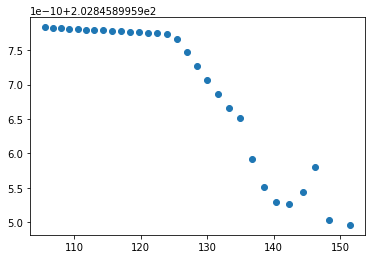

In [25]:
plt.scatter(df[0],original[0])